# PRAD 中 MIR100HG 表达状态预测 - XGBoost 建模流程

## 1. 数据信息

| 数据类型       | 文件名                                       | 样本数 | 特征数 |
|----------------|----------------------------------------------|--------|--------|
| 表达标签数据   | PRAD_Model_MIR100HG_Expression_Levels.csv    | 495    | 4      |
| 基因表达数据   | PRAD_Model_Gene_Expression_Features.csv      | 3737   | 496    |
| 甲基化数据     | PRAD_Model_Methylation_Features.csv          | 233    | 500    |

---

## 2. 数据预处理

| 步骤                | 操作内容                                                         |
|---------------------|------------------------------------------------------------------|
| MIR100HG处理        | 检测并剔除目标基因 `MIR100HG` 特征                              |
| 样本转置            | 基因表达、甲基化数据按样本维度转置                              |
| 特征前缀添加        | 表达特征加前缀 `Gene_`，甲基化特征加前缀 `Methylation_`        |
| 特征合并后形状      | 495 个样本 × 3969 个特征（Gene: 3736 + Methylation: 233）       |

---

## 3. 数据集划分

| 数据集     | 样本数 |
|------------|--------|
| 训练集     | 396    |
| 测试集     | 99     |

---

## 4. 特征选择（仅在训练集）

| 操作阶段         | 基因表达 | 甲基化 | 合计 |
|------------------|----------|--------|------|
| 方差过滤后特征数 | 3740     | 233    | 3973 |
| ANOVA筛选后特征  | 200      | 100    | 300  |

---

## 5. 模型训练：XGBoost

---

## 6. 特征重要性分析

### 特征来源比例

| 特征来源     | 占比    |
|--------------|---------|
| 基因表达     | 91.69%  |
| 甲基化       | 8.31%   |

### Top 20 基因表达特征

| 排名 | 特征名         | 权重     | 占比 (%)  |
|------|----------------|----------|-----------|
| 1    | Gene_NEXN      | 0.105321 | 10.5321   |
| 2    | Gene_CNRIP1    | 0.093497 | 9.3497    |
| 3    | Gene_SMIM10    | 0.077935 | 7.7935    |
| 4    | Gene_AGPAT4    | 0.044733 | 4.4733    |
| 5    | Gene_EDNRA     | 0.039426 | 3.9426    |
| 6    | Gene_SERPINF1  | 0.030807 | 3.0807    |
| 7    | Gene_BMERB1    | 0.026770 | 2.6770    |
| 8    | Gene_SPARCL1   | 0.018289 | 1.8289    |
| 9    | Gene_CARMN     | 0.017759 | 1.7759    |
| 10   | Gene_PLPP7     | 0.015483 | 1.5483    |
| 11   | Gene_LAMA4     | 0.014490 | 1.4490    |
| 12   | Gene_SLC16A4   | 0.013398 | 1.3398    |
| 13   | Gene_ANXA6     | 0.012942 | 1.2942    |
| 14   | Gene_GFPT2     | 0.012618 | 1.2618    |
| 15   | Gene_PDLIM7    | 0.012538 | 1.2538    |
| 16   | Gene_DKK3      | 0.011322 | 1.1322    |
| 17   | Gene_PODN      | 0.010991 | 1.0991    |
| 18   | Gene_GSN       | 0.010227 | 1.0227    |
| 19   | Gene_PRTFDC1   | 0.009846 | 0.9846    |
| 20   | Gene_PDE5A     | 0.009508 | 0.9508    |

### Top 20 甲基化特征

| 排名 | 特征名                | 权重     | 占比 (%) |
|------|------------------------|----------|----------|
| 1    | Methylation_cg17415451 | 0.008278 | 0.8278   |
| 2    | Methylation_cg03159396 | 0.007840 | 0.7840   |
| 3    | Methylation_cg24940138 | 0.006601 | 0.6601   |
| 4    | Methylation_cg07902749 | 0.004422 | 0.4422   |
| 5    | Methylation_cg16955889 | 0.004005 | 0.4005   |
| 6    | Methylation_cg15026277 | 0.003918 | 0.3918   |
| 7    | Methylation_cg06954520 | 0.003696 | 0.3696   |
| 8    | Methylation_cg05923595 | 0.002669 | 0.2669   |
| 9    | Methylation_cg01367393 | 0.002549 | 0.2549   |
| 10   | Methylation_cg02773086 | 0.002505 | 0.2505   |
| 11   | Methylation_cg22235821 | 0.002474 | 0.2474   |
| 12   | Methylation_cg21038156 | 0.002425 | 0.2425   |
| 13   | Methylation_cg26010734 | 0.002144 | 0.2144   |
| 14   | Methylation_cg00002719 | 0.002112 | 0.2112   |
| 15   | Methylation_cg08047907 | 0.001907 | 0.1907   |
| 16   | Methylation_cg19930575 | 0.001877 | 0.1877   |
| 17   | Methylation_cg12298212 | 0.001853 | 0.1853   |
| 18   | Methylation_cg18103730 | 0.001787 | 0.1787   |
| 19   | Methylation_cg14206172 | 0.001725 | 0.1725   |
| 20   | Methylation_cg22947965 | 0.001662 | 0.1662   |

---

## 7. 测试集性能评估

| 指标     | 数值     |
|----------|----------|
| 准确率   | 0.9293   |
| 精确率   | 0.9388   |
| 召回率   | 0.9200   |
| F1 分数  | 0.9293   |
| AUC      | 0.9735   |

**混淆矩阵**：

|               | 预测 Low | 预测 High |
|---------------|----------|-----------|
| 实际 Low      | 46       | 3         |
| 实际 High     | 4        | 46        |

---

## 8. 交叉验证结果（5折）

| Fold | 准确率 | 精确率 | 召回率 | F1分数 | AUC    |
|------|--------|--------|--------|--------|--------|
| 1    | 0.9091 | 0.9167 | 0.8980 | 0.9072 | 0.9588 |
| 2    | 0.9192 | 0.9184 | 0.9184 | 0.9184 | 0.9780 |
| 3    | 0.9293 | 0.8909 | 0.9800 | 0.9333 | 0.9849 |
| 4    | 0.8889 | 0.9535 | 0.8200 | 0.8817 | 0.9739 |
| 5    | 0.8990 | 0.9000 | 0.9000 | 0.9000 | 0.9751 |

**平均性能**：

| 指标     | 数值   |
|----------|--------|
| 平均准确率 | 0.9091 |
| 平均精确率 | 0.9159 |
| 平均召回率 | 0.9033 |
| 平均F1分数 | 0.9081 |
| 平均AUC    | 0.9741 |

---




MIR100HG表达数据形状: (495, 4)
基因表达数据形状: (3737, 495)
甲基化数据形状: (233, 499)
共同样本数量: 495
标签计数: Group
High    248
Low     247
Name: count, dtype: int64
删除MIR100HG以避免标签泄露
训练集样本数: 396
测试集样本数: 99
特征选择前:
基因表达特征数量: 3736
甲基化特征数量: 233
ANOVA选择后的基因表达特征数量: 200
ANOVA选择后的甲基化特征数量: 100
选择后的特征总数: 300

训练XGBoost模型...

特征重要性分析...

特征重要性百分比:
基因表达特征: 93.88%
甲基化特征: 6.12%

基因表达Top20特征:
       Feature  Percentage
    Gene_BHMT2   11.465944
     Gene_NEXN    9.630692
    Gene_PMP22    9.054894
   Gene_SMIM10    8.493559
    Gene_KCNJ8    6.773580
  Gene_SPARCL1    5.864990
     Gene_STOM    3.953316
   Gene_IGFBP4    2.728775
   Gene_TCEAL7    2.538224
    Gene_LAMA4    2.343289
   Gene_AGPAT4    1.799779
     Gene_DKK3    1.776380
 Gene_SERPINF1    1.676600
    Gene_PDE5A    1.480248
   Gene_CNRIP1    1.461607
 Gene_SERPING1    1.422662
      Gene_GSN    1.415891
Gene_MAGI2-AS3    1.408951
    Gene_TIMP2    1.354186
   Gene_DNM3OS    1.327115

甲基化Top20特征:
               Feature  Percentage
Methylation_cg17911788    1.

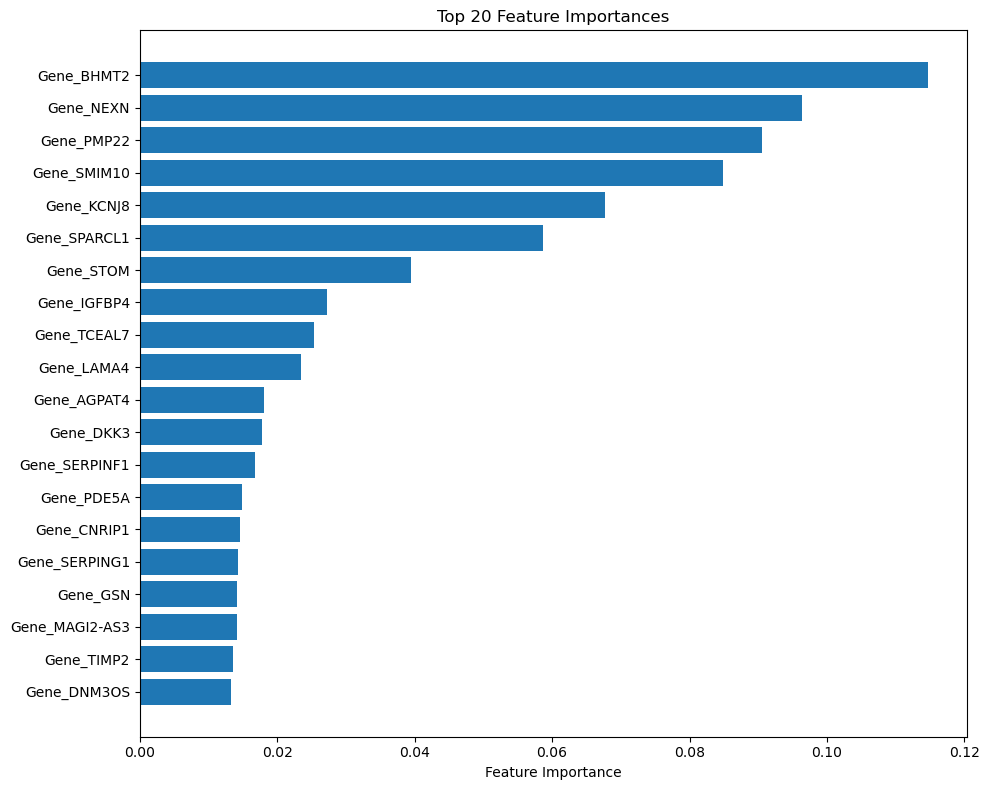

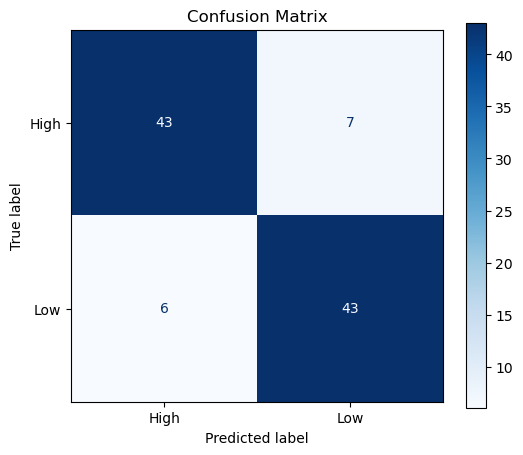

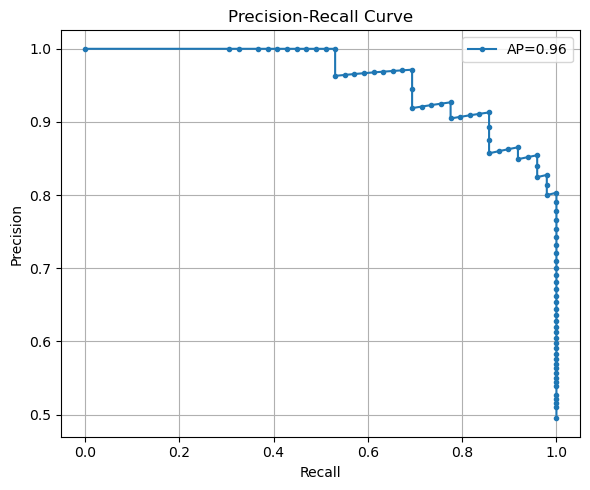

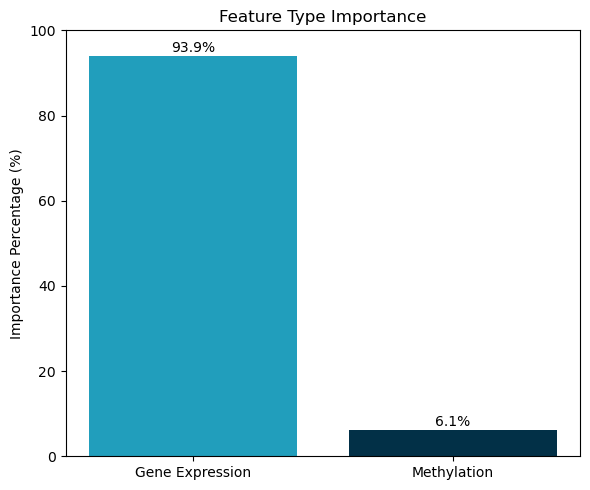


分析完成！所有结果已保存到: /Users/heweilin/Desktop/M-28/PRAD_Model/XGBoost/


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, average_precision_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import os

# 设置输出目录
output_dir = '/Users/heweilin/Desktop/M-28/PRAD_Model/XGBoost/'
os.makedirs(output_dir, exist_ok=True)

# ========================
# 1. 数据读取
# ========================
input_dir = '/Users/heweilin/Desktop/M-28/NTU_DATA_CLEANED/'
label_df = pd.read_csv(f'{input_dir}PRAD_Model_MIR100HG_Expression_Levels.csv')
gene_expr_df = pd.read_csv(f'{input_dir}PRAD_Model_Gene_Expression_Features.csv', index_col=0)
methylation_df = pd.read_csv(f'{input_dir}PRAD_Model_Methylation_Features.csv', index_col=0)

print("MIR100HG表达数据形状:", label_df.shape)
print("基因表达数据形状:", gene_expr_df.shape)
print("甲基化数据形状:", methylation_df.shape)

# ========================
# 2. 转置特征数据
# ========================
gene_expr_df_t = gene_expr_df.T
methylation_df_t = methylation_df.T

# ========================
# 3. 获取公共样本
# ========================
common_samples = list(set(gene_expr_df_t.index) & set(methylation_df_t.index))
gene_expr_df_t = gene_expr_df_t.loc[common_samples]
methylation_df_t = methylation_df_t.loc[common_samples]

print(f"共同样本数量: {len(common_samples)}")

# ========================
# 4. 标签处理
# ========================
label_df = label_df.set_index("Sample_ID")
label_df = label_df.reindex(gene_expr_df_t.index)
y = label_df["Group"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"标签计数: {pd.Series(y).value_counts()}")

# 删除 MIR100HG 避免标签泄露
if 'MIR100HG' in gene_expr_df_t.columns:
    print("删除MIR100HG以避免标签泄露")
    gene_expr_df_t = gene_expr_df_t.drop(columns=['MIR100HG'])

# ========================
# 5. 添加特征前缀
# ========================
# 为基因表达和甲基化特征添加前缀
gene_expr_df_t = gene_expr_df_t.add_prefix('Gene_')
methylation_df_t = methylation_df_t.add_prefix('Methylation_')

# ========================
# 6. 划分训练测试集
# ========================
X_train_full, X_test, y_train_full, y_test = train_test_split(
    pd.concat([gene_expr_df_t, methylation_df_t], axis=1), 
    y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

print(f"训练集样本数: {X_train_full.shape[0]}")
print(f"测试集样本数: {X_test.shape[0]}")

# ========================
# 7. 特征选择函数
# ========================
def select_features(X_train, y_train, k_gene=200, k_meth=100, var_threshold=0.005):
    # 分离基因表达和甲基化特征
    gene_columns = [col for col in X_train.columns if col.startswith('Gene_')]
    meth_columns = [col for col in X_train.columns if col.startswith('Methylation_')]
    
    X_train_gene = X_train[gene_columns]
    X_train_meth = X_train[meth_columns]
    
    print("特征选择前:")
    print(f"基因表达特征数量: {len(gene_columns)}")
    print(f"甲基化特征数量: {len(meth_columns)}")
    
    # 对基因表达特征进行ANOVA F检验
    k_gene_actual = min(k_gene, len(gene_columns))
    selector_gene = SelectKBest(score_func=f_classif, k=k_gene_actual)
    gene_selected = selector_gene.fit_transform(X_train_gene, y_train)
    gene_selected_cols = X_train_gene.columns[selector_gene.get_support(indices=True)]
    
    # 对甲基化特征进行ANOVA F检验
    k_meth_actual = min(k_meth, len(meth_columns))
    selector_meth = SelectKBest(score_func=f_classif, k=k_meth_actual)
    meth_selected = selector_meth.fit_transform(X_train_meth, y_train)
    meth_selected_cols = X_train_meth.columns[selector_meth.get_support(indices=True)]
    
    print(f"ANOVA选择后的基因表达特征数量: {len(gene_selected_cols)}")
    print(f"ANOVA选择后的甲基化特征数量: {len(meth_selected_cols)}")
    
    # 创建选定特征的DataFrame
    gene_selected_df = pd.DataFrame(gene_selected, index=X_train.index, columns=gene_selected_cols)
    meth_selected_df = pd.DataFrame(meth_selected, index=X_train.index, columns=meth_selected_cols)
    
    # 合并所选特征
    X_train_selected = pd.concat([gene_selected_df, meth_selected_df], axis=1)
    
    # 返回选定的特征和列名
    return X_train_selected, gene_selected_cols.tolist(), meth_selected_cols.tolist()

# ========================
# 8. 在训练集上进行特征选择
# ========================
X_train_selected, gene_selected_cols, meth_selected_cols = select_features(X_train_full, y_train_full)
print(f"选择后的特征总数: {X_train_selected.shape[1]}")

# 应用特征选择到测试集
X_test_selected = X_test[gene_selected_cols + meth_selected_cols]

# ========================
# 9. 训练XGBoost模型
# ========================
print("\n训练XGBoost模型...")
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    reg_alpha=1.0,
    reg_lambda=3.0,
    max_depth=2,
    n_estimators=50,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train_selected, y_train_full)

# ========================
# 10. 特征重要性分析
# ========================
def analyze_feature_importance(model, feature_names):
    importances = model.feature_importances_
    
    # 创建一个DataFrame来存储特征重要性
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # 按重要性排序
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    
    # 计算百分比
    feature_importance_df['Percentage'] = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum() * 100
    
    return feature_importance_df

# 分析特征重要性
print("\n特征重要性分析...")
feature_importance = analyze_feature_importance(model, X_train_selected.columns)

# 分类特征并计算每类特征的总重要性
gene_importance = feature_importance[feature_importance['Feature'].str.startswith('Gene_')]
methylation_importance = feature_importance[feature_importance['Feature'].str.startswith('Methylation_')]

gene_importance_sum = gene_importance['Importance'].sum()
methylation_importance_sum = methylation_importance['Importance'].sum()
total_importance = gene_importance_sum + methylation_importance_sum

# 打印特征重要性统计
print("\n特征重要性百分比:")
print(f"基因表达特征: {gene_importance_sum / total_importance * 100:.2f}%")
print(f"甲基化特征: {methylation_importance_sum / total_importance * 100:.2f}%")

# 打印按类别分组的Top20特征
print("\n基因表达Top20特征:")
print(gene_importance.head(20)[['Feature', 'Percentage']].to_string(index=False))

print("\n甲基化Top20特征:")
print(methylation_importance.head(20)[['Feature', 'Percentage']].to_string(index=False))

print("\n总体Top20特征:")
print(feature_importance.head(20)[['Feature', 'Percentage']].to_string(index=False))

# 保存特征重要性结果
gene_importance.to_csv(os.path.join(output_dir, 'PRAD_XGBoost_Gene_Importance.csv'), index=False)
methylation_importance.to_csv(os.path.join(output_dir, 'PRAD_XGBoost_Methylation_Importance.csv'), index=False)
feature_importance.to_csv(os.path.join(output_dir, 'PRAD_XGBoost_All_Features_Importance.csv'), index=False)

# ========================
# 11. 在测试集上评估模型
# ========================
print("\n在测试集上评估模型...")
y_pred = model.predict(X_test_selected)
y_proba = model.predict_proba(X_test_selected)[:, 1]

# 计算各种评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# 打印评估结果
print("\n测试集性能指标:")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1分数: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("混淆矩阵:")
print(cm)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ========================
# 12. 交叉验证
# ========================
print("\n执行交叉验证...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {
    'fold': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auc': []
}

X_full = pd.concat([gene_expr_df_t, methylation_df_t], axis=1)
fold = 1

for train_idx, val_idx in skf.split(X_full, y_encoded):
    print(f"\n执行第{fold}折交叉验证...")
    
    # 获取当前fold的训练和验证数据
    X_fold_train, X_fold_val = X_full.iloc[train_idx], X_full.iloc[val_idx]
    y_fold_train, y_fold_val = y_encoded[train_idx], y_encoded[val_idx]
    
    # 在fold内进行特征选择
    print(f"Fold {fold} - 特征选择...")
    X_fold_train_selected, fold_gene_cols, fold_meth_cols = select_features(X_fold_train, y_fold_train)
    X_fold_val_selected = X_fold_val[fold_gene_cols + fold_meth_cols]
    
    # 训练模型
    print(f"Fold {fold} - 训练模型...")
    fold_model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        reg_alpha=1.0,
        reg_lambda=3.0,
        max_depth=2,
        n_estimators=50,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    fold_model.fit(X_fold_train_selected, y_fold_train)
    
    # 预测
    y_fold_pred = fold_model.predict(X_fold_val_selected)
    y_fold_prob = fold_model.predict_proba(X_fold_val_selected)[:, 1]
    
    # 计算性能指标
    fold_accuracy = accuracy_score(y_fold_val, y_fold_pred)
    fold_precision = precision_score(y_fold_val, y_fold_pred)
    fold_recall = recall_score(y_fold_val, y_fold_pred)
    fold_f1 = f1_score(y_fold_val, y_fold_pred)
    fold_auc = roc_auc_score(y_fold_val, y_fold_prob)
    
    # 打印本折结果
    print(f"Fold {fold} - 性能指标:")
    print(f"  准确率: {fold_accuracy:.4f}")
    print(f"  精确率: {fold_precision:.4f}")
    print(f"  召回率: {fold_recall:.4f}")
    print(f"  F1分数: {fold_f1:.4f}")
    print(f"  AUC: {fold_auc:.4f}")
    
    # 保存结果
    cv_results['fold'].append(fold)
    cv_results['accuracy'].append(fold_accuracy)
    cv_results['precision'].append(fold_precision)
    cv_results['recall'].append(fold_recall)
    cv_results['f1'].append(fold_f1)
    cv_results['auc'].append(fold_auc)
    
    # 分析特征重要性
    fold_importance = analyze_feature_importance(fold_model, X_fold_train_selected.columns)
    
    # 保存本折的特征重要性
    fold_importance.to_csv(os.path.join(output_dir, f'PRAD_XGBoost_Fold{fold}_Feature_Importance.csv'), index=False)
    
    fold += 1

# 计算交叉验证的平均性能
cv_results_df = pd.DataFrame(cv_results)
cv_mean = cv_results_df.mean()

print("\n交叉验证平均性能:")
print(f"平均准确率: {cv_mean['accuracy']:.4f}")
print(f"平均精确率: {cv_mean['precision']:.4f}")
print(f"平均召回率: {cv_mean['recall']:.4f}")
print(f"平均F1分数: {cv_mean['f1']:.4f}")
print(f"平均AUC: {cv_mean['auc']:.4f}")

# 保存交叉验证结果
cv_results_df.to_csv(os.path.join(output_dir, 'PRAD_XGBoost_CV_Results.csv'), index=False)

# ========================
# 13. 可视化
# ========================
# 特征重要性柱状图 - Top 20
plt.figure(figsize=(10, 8))
indices = np.argsort(feature_importance['Importance'])[-20:][::-1]
plt.barh(range(20), feature_importance['Importance'].iloc[indices], align='center')
plt.yticks(range(20), feature_importance['Feature'].iloc[indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Top20_Feature_Importance.png'))
plt.show()

# 混淆矩阵热力图
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.savefig(os.path.join(output_dir, 'Confusion_Matrix.png'))
plt.show()

# 精确率-召回率曲线
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='.', label=f'AP={avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Precision_Recall_Curve.png'))
plt.show()

# 各类特征的重要性占比
plt.figure(figsize=(6, 5))
plt.bar(['Gene Expression', 'Methylation'], 
        [gene_importance_sum / total_importance * 100, 
         methylation_importance_sum / total_importance * 100],
        color=['#219ebc', '#023047'])
plt.title("Feature Type Importance")
plt.ylabel("Importance Percentage (%)")
plt.ylim(0, 100)
for i, v in enumerate([gene_importance_sum / total_importance * 100, 
                       methylation_importance_sum / total_importance * 100]):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Feature_Type_Importance.png'))
plt.show()

print("\n分析完成！所有结果已保存到:", output_dir)

# 整理没有经过deg dma处理的数据

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, average_precision_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import os

# ========================
# 1. 数据读取
# ========================
input_dir = '/Users/heweilin/Desktop/M-28/NTU_DATA_CLEANED/'
label_df = pd.read_csv(f'{input_dir}PRAD_Model_MIR100HG_Expression_Levels.csv')
gene_expr_df = pd.read_csv(f'{input_dir}PRAD_Model_Gene_Expression_Features_Test.csv', index_col=0)
methylation_df = pd.read_csv(f'{input_dir}PRAD_Model_Methylation_Features_Test.csv', index_col=0)

print("MIR100HG表达数据形状:", label_df.shape)
print("基因表达数据形状:", gene_expr_df.shape)
print("甲基化数据形状:", methylation_df.shape)

# ========================
# 2. 转置特征数据
# ========================
gene_expr_df_t = gene_expr_df.T
methylation_df_t = methylation_df.T

# ========================
# 3. 获取公共样本
# ========================
common_samples = list(set(gene_expr_df_t.index) & set(methylation_df_t.index))
gene_expr_df_t = gene_expr_df_t.loc[common_samples]
methylation_df_t = methylation_df_t.loc[common_samples]

print(f"共同样本数量: {len(common_samples)}")

# ========================
# 4. 标签处理
# ========================
label_df = label_df.set_index("Sample_ID")
label_df = label_df.reindex(gene_expr_df_t.index)
y = label_df["Group"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"标签计数: {pd.Series(y).value_counts()}")

# 删除 MIR100HG 避免标签泄露
if 'MIR100HG' in gene_expr_df_t.columns:
    print("删除MIR100HG以避免标签泄露")
    gene_expr_df_t = gene_expr_df_t.drop(columns=['MIR100HG'])

# ========================
# 5. 添加特征前缀
# ========================
# 为基因表达和甲基化特征添加前缀
gene_expr_df_t = gene_expr_df_t.add_prefix('Gene_')
methylation_df_t = methylation_df_t.add_prefix('Methylation_')

# ========================
# 6. 划分训练测试集
# ========================
X_train_full, X_test, y_train_full, y_test = train_test_split(
    pd.concat([gene_expr_df_t, methylation_df_t], axis=1), 
    y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

print(f"训练集样本数: {X_train_full.shape[0]}")
print(f"测试集样本数: {X_test.shape[0]}")

# ========================
# 7. 特征选择函数
# ========================
def select_features(X_train, y_train, k_gene=200, k_meth=100, var_threshold=0.005):
    # 分离基因表达和甲基化特征
    gene_columns = [col for col in X_train.columns if col.startswith('Gene_')]
    meth_columns = [col for col in X_train.columns if col.startswith('Methylation_')]
    
    X_train_gene = X_train[gene_columns]
    X_train_meth = X_train[meth_columns]
    
    print("特征选择前:")
    print(f"基因表达特征数量: {len(gene_columns)}")
    print(f"甲基化特征数量: {len(meth_columns)}")
    
    # 对基因表达特征进行ANOVA F检验
    k_gene_actual = min(k_gene, len(gene_columns))
    selector_gene = SelectKBest(score_func=f_classif, k=k_gene_actual)
    gene_selected = selector_gene.fit_transform(X_train_gene, y_train)
    gene_selected_cols = X_train_gene.columns[selector_gene.get_support(indices=True)]
    
    # 对甲基化特征进行ANOVA F检验
    k_meth_actual = min(k_meth, len(meth_columns))
    selector_meth = SelectKBest(score_func=f_classif, k=k_meth_actual)
    meth_selected = selector_meth.fit_transform(X_train_meth, y_train)
    meth_selected_cols = X_train_meth.columns[selector_meth.get_support(indices=True)]
    
    print(f"ANOVA选择后的基因表达特征数量: {len(gene_selected_cols)}")
    print(f"ANOVA选择后的甲基化特征数量: {len(meth_selected_cols)}")
    
    # 创建选定特征的DataFrame
    gene_selected_df = pd.DataFrame(gene_selected, index=X_train.index, columns=gene_selected_cols)
    meth_selected_df = pd.DataFrame(meth_selected, index=X_train.index, columns=meth_selected_cols)
    
    # 合并所选特征
    X_train_selected = pd.concat([gene_selected_df, meth_selected_df], axis=1)
    
    # 返回选定的特征和列名
    return X_train_selected, gene_selected_cols.tolist(), meth_selected_cols.tolist()

# ========================
# 8. 在训练集上进行特征选择
# ========================
X_train_selected, gene_selected_cols, meth_selected_cols = select_features(X_train_full, y_train_full)
print(f"选择后的特征总数: {X_train_selected.shape[1]}")

# 应用特征选择到测试集
X_test_selected = X_test[gene_selected_cols + meth_selected_cols]

# ========================
# 9. 训练XGBoost模型
# ========================
print("\n训练XGBoost模型...")
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    reg_alpha=1.0,
    reg_lambda=3.0,
    max_depth=2,
    n_estimators=50,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train_selected, y_train_full)

# ========================
# 10. 特征重要性分析
# ========================
def analyze_feature_importance(model, feature_names):
    importances = model.feature_importances_
    
    # 创建一个DataFrame来存储特征重要性
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # 按重要性排序
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    
    # 计算百分比
    feature_importance_df['Percentage'] = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum() * 100
    
    return feature_importance_df

# 分析特征重要性
print("\n特征重要性分析...")
feature_importance = analyze_feature_importance(model, X_train_selected.columns)

# 分类特征并计算每类特征的总重要性
gene_importance = feature_importance[feature_importance['Feature'].str.startswith('Gene_')]
methylation_importance = feature_importance[feature_importance['Feature'].str.startswith('Methylation_')]

gene_importance_sum = gene_importance['Importance'].sum()
methylation_importance_sum = methylation_importance['Importance'].sum()
total_importance = gene_importance_sum + methylation_importance_sum

# 打印特征重要性统计
print("\n特征重要性百分比:")
print(f"基因表达特征: {gene_importance_sum / total_importance * 100:.2f}%")
print(f"甲基化特征: {methylation_importance_sum / total_importance * 100:.2f}%")

# 打印按类别分组的Top20特征
print("\n基因表达Top20特征:")
print(gene_importance.head(20)[['Feature', 'Percentage']].to_string(index=False))

print("\n甲基化Top20特征:")
print(methylation_importance.head(20)[['Feature', 'Percentage']].to_string(index=False))

print("\n总体Top20特征:")
print(feature_importance.head(20)[['Feature', 'Percentage']].to_string(index=False))

# ========================
# 11. 在测试集上评估模型
# ========================
print("\n在测试集上评估模型...")
y_pred = model.predict(X_test_selected)
y_proba = model.predict_proba(X_test_selected)[:, 1]

# 计算各种评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# 打印评估结果
print("\n测试集性能指标:")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1分数: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("混淆矩阵:")
print(cm)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ========================
# 12. 交叉验证
# ========================
print("\n执行交叉验证...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {
    'fold': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auc': []
}

X_full = pd.concat([gene_expr_df_t, methylation_df_t], axis=1)
fold = 1

for train_idx, val_idx in skf.split(X_full, y_encoded):
    print(f"\n执行第{fold}折交叉验证...")
    
    # 获取当前fold的训练和验证数据
    X_fold_train, X_fold_val = X_full.iloc[train_idx], X_full.iloc[val_idx]
    y_fold_train, y_fold_val = y_encoded[train_idx], y_encoded[val_idx]
    
    # 在fold内进行特征选择
    print(f"Fold {fold} - 特征选择...")
    X_fold_train_selected, fold_gene_cols, fold_meth_cols = select_features(X_fold_train, y_fold_train)
    X_fold_val_selected = X_fold_val[fold_gene_cols + fold_meth_cols]
    
    # 训练模型
    print(f"Fold {fold} - 训练模型...")
    fold_model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        reg_alpha=1.0,
        reg_lambda=3.0,
        max_depth=2,
        n_estimators=50,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    fold_model.fit(X_fold_train_selected, y_fold_train)
    
    # 预测
    y_fold_pred = fold_model.predict(X_fold_val_selected)
    y_fold_prob = fold_model.predict_proba(X_fold_val_selected)[:, 1]
    
    # 计算性能指标
    fold_accuracy = accuracy_score(y_fold_val, y_fold_pred)
    fold_precision = precision_score(y_fold_val, y_fold_pred)
    fold_recall = recall_score(y_fold_val, y_fold_pred)
    fold_f1 = f1_score(y_fold_val, y_fold_pred)
    fold_auc = roc_auc_score(y_fold_val, y_fold_prob)
    
    # 打印本折结果
    print(f"Fold {fold} - 性能指标:")
    print(f"  准确率: {fold_accuracy:.4f}")
    print(f"  精确率: {fold_precision:.4f}")
    print(f"  召回率: {fold_recall:.4f}")
    print(f"  F1分数: {fold_f1:.4f}")
    print(f"  AUC: {fold_auc:.4f}")
    
    # 保存结果
    cv_results['fold'].append(fold)
    cv_results['accuracy'].append(fold_accuracy)
    cv_results['precision'].append(fold_precision)
    cv_results['recall'].append(fold_recall)
    cv_results['f1'].append(fold_f1)
    cv_results['auc'].append(fold_auc)
    
    # 分析特征重要性
    fold_importance = analyze_feature_importance(fold_model, X_fold_train_selected.columns)
    
    # 保存本折的特征重要性
    fold_importance.to_csv(os.path.join(output_dir, f'PRAD_XGBoost_Fold{fold}_Feature_Importance.csv'), index=False)
    
    fold += 1

# 计算交叉验证的平均性能
cv_results_df = pd.DataFrame(cv_results)
cv_mean = cv_results_df.mean()

print("\n交叉验证平均性能:")
print(f"平均准确率: {cv_mean['accuracy']:.4f}")
print(f"平均精确率: {cv_mean['precision']:.4f}")
print(f"平均召回率: {cv_mean['recall']:.4f}")
print(f"平均F1分数: {cv_mean['f1']:.4f}")
print(f"平均AUC: {cv_mean['auc']:.4f}")





MIR100HG表达数据形状: (495, 4)
基因表达数据形状: (40060, 495)
甲基化数据形状: (381182, 499)
共同样本数量: 495
标签计数: Group
High    248
Low     247
Name: count, dtype: int64
删除MIR100HG以避免标签泄露
训练集样本数: 396
测试集样本数: 99
特征选择前:
基因表达特征数量: 40059
甲基化特征数量: 381182
ANOVA选择后的基因表达特征数量: 200
ANOVA选择后的甲基化特征数量: 100
选择后的特征总数: 300

训练XGBoost模型...

特征重要性分析...

特征重要性百分比:
基因表达特征: 88.22%
甲基化特征: 11.78%

基因表达Top20特征:
       Feature  Percentage
    Gene_MSRB3    9.779516
  Gene_SPARCL1    8.918134
    Gene_KCNJ8    8.250875
   Gene_SMIM10    7.975246
    Gene_PMP22    7.695159
     Gene_NEXN    6.611214
    Gene_BHMT2    6.058961
Gene_MAGI2-AS3    2.656407
   Gene_TCEAL7    2.318767
   Gene_IGFBP4    2.292464
    Gene_LAMA4    1.981828
      Gene_GSN    1.830399
     Gene_STOM    1.625880
     Gene_DKK3    1.544488
   Gene_POPDC2    1.511198
    Gene_PDE5A    1.508370
 Gene_SERPINF1    1.504682
   Gene_AGPAT4    1.062514
   Gene_DNM3OS    1.062300
    Gene_GFPT2    1.059397

甲基化Top20特征:
               Feature  Percentage
Methylation_cg10259